In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.model_selection import learning_curve

# importing the Saved model

In [2]:
import pathlib
path_to_read_model=str(pathlib.Path.cwd()) #Path of current working Directory
with open(path_to_read_model + '\\model.pkl', 'rb') as f:
    model = pickle.load(f)

In [3]:
model

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pp_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['reading score',
                                                   'math score']),
                                                 ('pp_catN',
                                                  Pipeline(steps=[('col_catN',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('catN',
                                                                   OneHotEncoder(handle_unknown='ignore',
                        

# Target-feature split

In [4]:
df = pd.read_csv('StudentsPerformance.csv')
X, y = df.drop('writing score', axis=1), df['writing score']

# Checking the learning curve

In [5]:
a, b, c = learning_curve(estimator = model, x=X, y=y, n_jobs=-1, cv=5, scoring = 'neg_root_mean_squared_error')

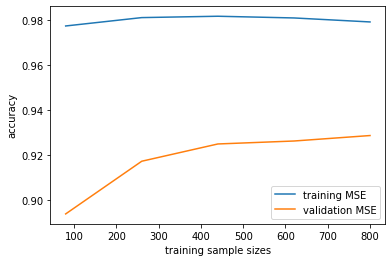

In [6]:
plt.plot(a, b.mean(axis=1), label='training MSE')
plt.plot(a, c.mean(axis=1),  label='validation MSE')
plt.xlabel('training sample sizes')
plt.ylabel('neg_root_mean_squared_error')
plt.legend()
#Overfiting

# New Predictions  
Making predictions on a new data point NOT seen by the model

In [7]:
# Input features
q = pd.DataFrame([['female', 'group A', 'high school', 'standard', 'completed', 50,87]],
             columns=X.columns)
q

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group A,high school,standard,completed,50,87


In [8]:
# predicting the writing score
model.predict(q)

array([82.80601094])